# **Eight Puzzle Problem**

### **Problem Formulation**

<small style="font-size: 15px;">

**State Representation:**

Each state represents the configuration of the 3×3 board, where tiles are numbered 1 to 8, and a blank space. The state describes the position of all tiles at any given moment.

**Initial State:**

Any valid arrangement of the tiles can be chosen as the starting configuration. However, not all random initial states are solvable due to parity constraints in tile movements.

**Goal State:**

The goal configuration is typically:

1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 

4&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6  

7&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8  

The objective is to move tiles to reach this arrangement using the fewest possible moves.

**Actions:**

The allowed actions involve,
- Move Up&nbsp;-&nbsp;move the blank space up by swapping with the tile above.

- Move Down&nbsp;-&nbsp;move the blank space down by swapping with the tile below.

- Move Left&nbsp;-&nbsp;move the blank space left by swapping with the tile to the left.

- Move Right&nbsp;-&nbsp;move the blank space right by swapping with the tile to the right.

Each move results in a new board configuration or new state in the search space

**Transition Model:**

Given a current state and an action, the transition model returns the resulting new state after applying that action.

**Path Cost:**

Each move has a uniform cost of 1. The total cost of a solution is the number of moves required to reach the goal state from the initial configuration.

**Solution Approach:**

This implementation of the 8 Puzzle Problem employs the A* search algorithm to efficiently find the shortest path from a random initial state 
to the goal state, where the numbers 1 to 8 are arranged in a chronological order. The puzzle is represented as a 3×3 grid, where numbered 
tiles can slide into the empty space following four valid moves, Left, Right, Up, and Down. The program first generates a random puzzle board and visually displays it using matplotlib. The puzzle board is stored as a NumPy array, which helps efficiently manipulate state transitions. The game execution begins by, initializing the board and running the solver. The solver implements the A* search algorithm. It maintains a priority queue where states are prioritized based on their path cost (g) and heuristic value (h). The heuristic function used is Manhattan Distance, which estimates the sum of the distances each tile must move to reach its correct position. The algorithm expands states by applying valid moves and explores paths until the goal state is reached. During execution, each move leads to a new puzzle state, recorded in the solution path. If a solution exists, the program visualizes each step in the solving process. If no solution is found such as in the case of an unsolvable configuration the program prints No solution found and terminates. This approach ensures an optimal solution when a path exists, efficiently navigating the search space using heuristics and priority-based expansion.

</small>

### **Implementation**

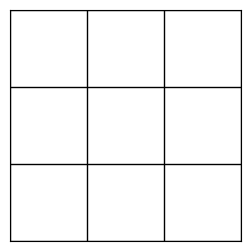

Board of size 3 is created.

Let's start the game.



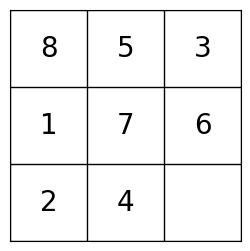

Step 1:


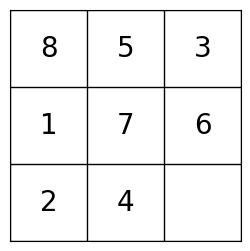

Step 2:


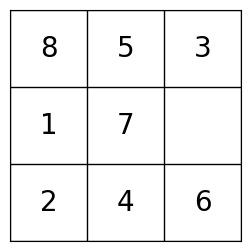

Step 3:


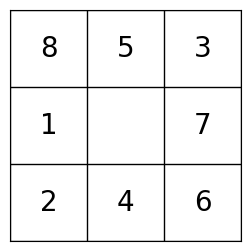

Step 4:


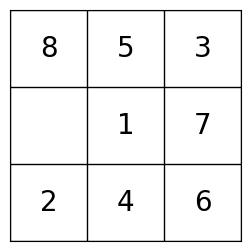

Step 5:


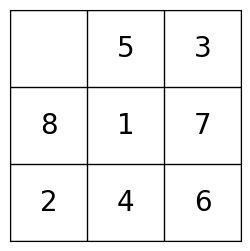

Step 6:


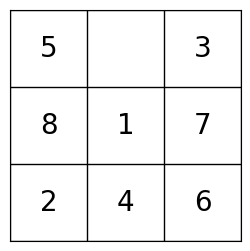

Step 7:


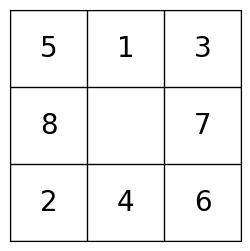

Step 8:


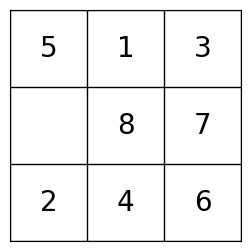

Step 9:


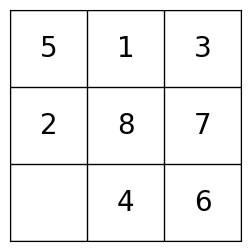

Step 10:


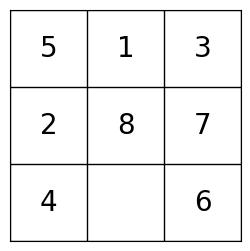

Step 11:


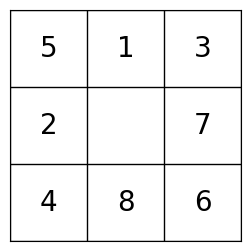

Step 12:


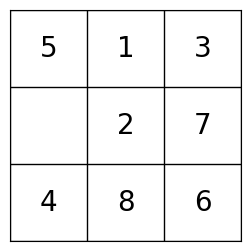

Step 13:


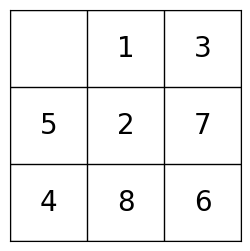

Step 14:


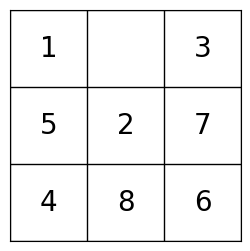

Step 15:


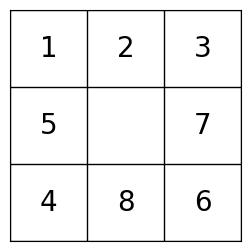

Step 16:


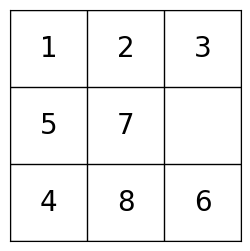

Step 17:


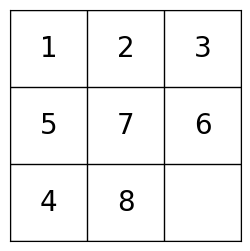

Step 18:


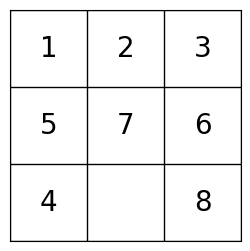

Step 19:


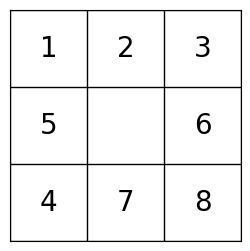

Step 20:


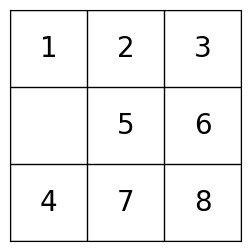

Step 21:


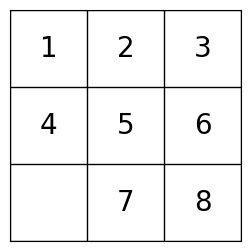

Step 22:


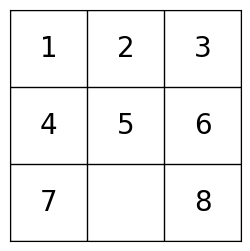

Step 23:


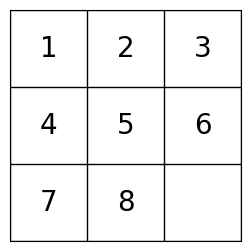

Goal State is reached.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import heapq
import time
def display_board(board_matrix, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(board_matrix, interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
def create_empty_board(size):
    return np.ones((size, size, 3)) 
def display_numbered_board(number_board, delay=0.8):
    size = number_board.shape[0]
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(np.ones((size, size, 3)), interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    for i in range(size):
        for j in range(size):
            val = number_board[i, j]
            if val != 0:
                ax.text(j, i, str(val), va='center', ha='center', fontsize=20, color='black')
    plt.show(block=False)
    plt.pause(delay)
    plt.close()
goal = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
def find_empty(puzzle):
    for i in range(3):
        for j in range(3):
            if puzzle[i][j] == 0:
                return i, j
def heuristic(puzzle):
    dist = 0
    for i in range(3):
        for j in range(3):
            if puzzle[i][j] and puzzle[i][j] != 0:
                x, y = divmod(puzzle[i][j] - 1, 3)
                dist += abs(x - i) + abs(y - j)
    return dist
def get_moves(puzzle):
    x, y = find_empty(puzzle)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    next_states = []
    for dx, dy in directions:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < 3 and 0 <= new_y < 3:
            new_puzzle = [row[:] for row in puzzle]
            new_puzzle[x][y], new_puzzle[new_x][new_y] = new_puzzle[new_x][new_y], new_puzzle[x][y]
            next_states.append(new_puzzle)
    return next_states
def solve_puzzle(start):
    pq = []
    heapq.heappush(pq, (heuristic(start), 0, start, []))
    visited = set()
    while pq:
        _, g, state, path = heapq.heappop(pq)
        if state == goal:
            return path + [state]
        visited.add(tuple(tuple(row) for row in state))
        for next_state in get_moves(state):
            if tuple(tuple(row) for row in next_state) not in visited:
                heapq.heappush(pq, (g + 1 + heuristic(next_state), g + 1, next_state, path + [state]))
    return None
def generate_random_puzzle():
    numbers = list(range(9))
    random.shuffle(numbers)
    board = np.array(numbers).reshape(3, 3)
    return board
def run_game():
    size = 3
    board_matrix = create_empty_board(size)
    display_board(board_matrix, size)
    print(f"Board of size {size} is created.\n")
    print("Let's start the game.\n")
    puzzle_board = generate_random_puzzle()
    display_numbered_board(puzzle_board)
    start_state = puzzle_board.tolist()
    solution = solve_puzzle(start_state)
    if solution:
        for step, state in enumerate(solution):
            print(f"Step {step+1}:")
            display_numbered_board(np.array(state))
        print("Goal State is reached.")
    else:
        print("No solution found.")
run_game()